In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install researchpy
import researchpy as rp
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats



ModuleNotFoundError: No module named 'stastsmodels'

In [ ]:
import pandas as pd
import random
import numpy as np

# Define the list of car names and their respective price ranges (mean and std deviation)
car_names = ["toyota", "mercedes", "mazda", "chevy", "ram"]
car_price_stats = {
    "toyota": {"mean": 7000, "std": 500},
    "mercedes": {"mean": 9000, "std": 800},
    "mazda": {"mean": 7500, "std":400 },
    "chevy": {"mean": 7500, "std": 600},
    "ram": {"mean": 8000, "std": 700}
}

# Set the number of rows for the DataFrame
num_rows = 1000

# Generate random data
random_car_names = [random.choice(car_names) for _ in range(num_rows)]
random_avg_prices = [
    int(np.clip(
        np.random.normal(
            car_price_stats[car]["mean"],
            car_price_stats[car]["std"]
        ),
        5000, 10000
    ))
    for car in random_car_names
]

# Create the DataFrame
data = {
    "car_name": random_car_names,
    "avg_price": random_avg_prices
}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

    car_name  avg_price
0      chevy       7016
1     toyota       6341
2      mazda       6570
3      chevy       7664
4     toyota       6827
..       ...        ...
995      ram       7824
996      ram       8697
997      ram       7510
998   toyota       6483
999   toyota       7356

[1000 rows x 2 columns]


In [ ]:
df.head()

,car_name,avg_price
0,ram,7004
1,mercedes,9963
2,mercedes,8240
3,mazda,6822
4,toyota,7175


In [ ]:
rp.summary_cont(df['avg_price'].groupby(df['car_name']))

,N,Mean,SD,SE,95% Conf.,Interval
car_name,,,,,,
chevy,216,7456.9861,1460.6497,99.3846,7261.0931,7652.8791
mazda,197,7503.8477,1482.5251,105.6255,7295.5392,7712.1562
mercedes,197,7631.9188,1426.5096,101.6346,7431.4810,7832.3566
ram,199,7588.0151,1410.5046,99.9880,7390.8369,7785.1932
toyota,191,7498.8272,1483.5797,107.3481,7287.0802,7710.5743


In [ ]:
model_car= smf.ols('avg_price~C(car_name)', data=df).fit()
anova_model= anova_lm(model_car)
print(anova_model)

                df        sum_sq       mean_sq           F         PR(>F)
C(car_name)    4.0  7.179516e+08  1.794879e+08  502.983459  3.749228e-237
Residual     995.0  3.550623e+08  3.568465e+05         NaN            NaN


In [ ]:
tukey_car= pairwise_tukeyhsd(df['avg_price'], groups= data['car_name'])
print(tukey_car.summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
   chevy    mazda    -8.5282 0.9999  -175.5426   158.4862  False
   chevy mercedes  1458.8179    0.0   1293.093  1624.5429   True
   chevy      ram   480.9276    0.0   316.6236   645.2316   True
   chevy   toyota  -487.0199    0.0    -652.33  -321.7098   True
   mazda mercedes  1467.3461    0.0  1299.9211  1634.7711   True
   mazda      ram   489.4558    0.0   323.4372   655.4743   True
   mazda   toyota  -478.4917    0.0  -645.5061  -311.4773   True
mercedes      ram  -977.8903    0.0 -1142.6117   -813.169   True
mercedes   toyota -1945.8378    0.0 -2111.5628 -1780.1129   True
     ram   toyota  -967.9475    0.0 -1132.2515  -803.6435   True
----------------------------------------------------------------


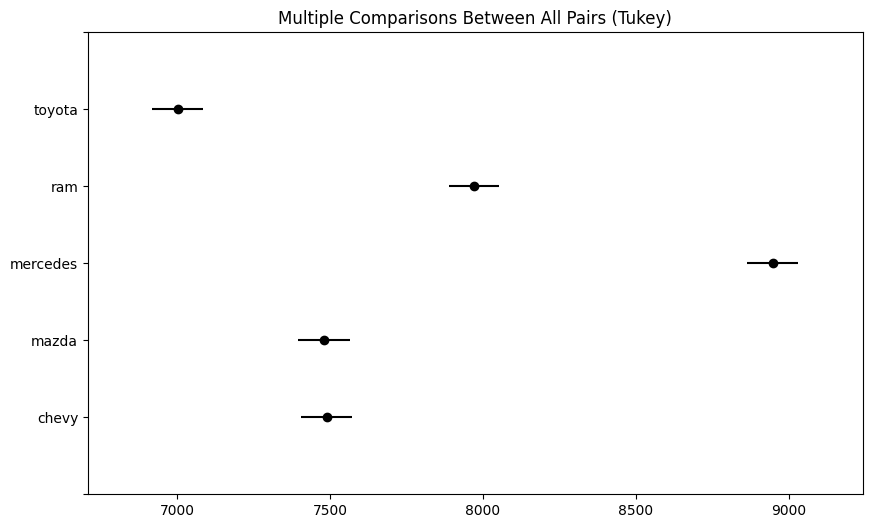

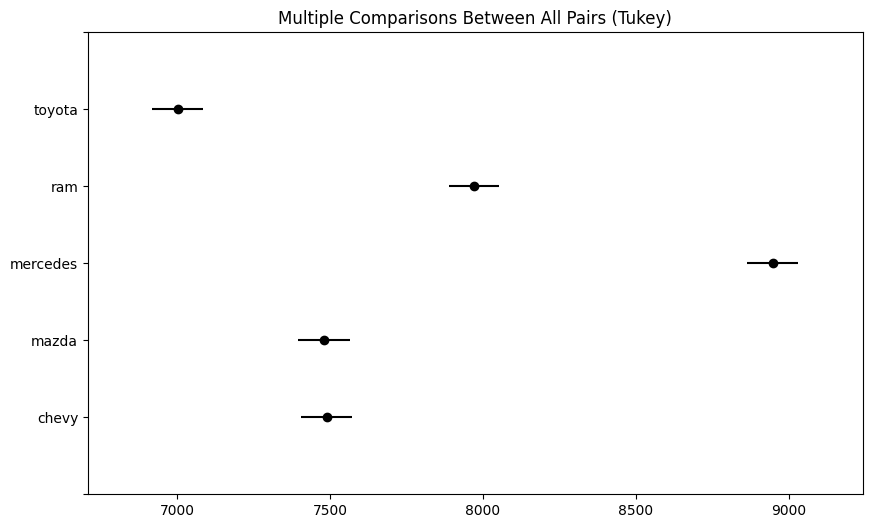

In [ ]:
tukey_car.plot_simultaneous()

In [ ]:
df_tukey_car = pd.DataFrame(data=tukey_car._results_table.data[1:],
                            columns=tukey_car._results_table.data[0])

In [ ]:
df_tukey_car.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,chevy,mazda,-8.5282,0.9999,-175.5426,158.4862,False
1,chevy,mercedes,1458.8179,0.0000,1293.0930,1624.5429,True
2,chevy,ram,480.9276,0.0000,316.6236,645.2316,True
3,chevy,toyota,-487.0199,0.0000,-652.3300,-321.7098,True
4,mazda,mercedes,1467.3461,0.0000,1299.9211,1634.7711,True


In [ ]:

import string
import pandas as pd

def letters(df, alpha=0.05):

    df["p-adj"] = df["p-adj"].astype(float)

    # Creating a list of the different treatment groups from Tukey's
    group1 = set(df.group1.tolist())  # Dropping duplicates by creating a set
    group2 = set(df.group2.tolist())  # Dropping duplicates by creating a set
    groupSet = group1 | group2  # Set operation that creates a union of 2 sets
    groups = list(groupSet) #removed sorted from here

    # Creating lists of letters that will be assigned to treatment groups
    letters = list(string.ascii_lowercase)[:len(groups)]
    cldgroups = letters

    # the following algoritm is a simplification of the classical cld,

    cld = pd.DataFrame(list(zip(groups, letters, cldgroups)))
    cld[3]=""

    for row in df.itertuples():
        if df["p-adj"][row[0]] > (alpha):
            cld.iat[groups.index(df["group1"][row[0]]), 2] += cld.iat[groups.index(df["group2"][row[0]]), 1]
            cld.iat[groups.index(df["group2"][row[0]]), 2] += cld.iat[groups.index(df["group1"][row[0]]), 1]

        if df["p-adj"][row[0]] < (alpha):
                cld.iat[groups.index(df["group1"][row[0]]), 3] +=  cld.iat[groups.index(df["group2"][row[0]]), 1]
                cld.iat[groups.index(df["group2"][row[0]]), 3] +=  cld.iat[groups.index(df["group1"][row[0]]), 1]

    cld[2] = cld[2].apply(lambda x: "".join(sorted(x)))
    cld[3] = cld[3].apply(lambda x: "".join(sorted(x)))
    cld.rename(columns={0: "groups"}, inplace=True)

    # this part will reassign the final name to the group
    # for sure there are more elegant ways of doing this
    cld = cld.sort_values(cld.columns[2], key=lambda x: x.str.len())
    cld["labels"] = ""
    letters = list(string.ascii_lowercase)
    unique = []
    for item in cld[2]:

        for fitem in cld["labels"].unique():
            for c in range(0, len(fitem)):
                if not set(unique).issuperset(set(fitem[c])):
                    unique.append(fitem[c])
        g = len(unique)

        for kitem in cld[1]:
            if kitem in item:
                if cld["labels"].loc[cld[1] == kitem].iloc[0] == "":
                    cld["labels"].loc[cld[1] == kitem] += letters[g]

                #Checking if there are forbidden pairing (proposition of solution to the imperfect script)
                if kitem in ' '.join(cld[3][cld["labels"]==letters[g]]):
                    g=len(unique)+1

                # Checking if columns 1 & 2 of cld share at least 1 letter
                if len(set(cld["labels"].loc[cld[1] == kitem].iloc[0]).intersection(cld.loc[cld[2] == item, "labels"].iloc[0])) <= 0:
                    if letters[g] not in list(cld["labels"].loc[cld[1] == kitem].iloc[0]):
                        cld["labels"].loc[cld[1] == kitem] += letters[g]
                    if letters[g] not in list(cld["labels"].loc[cld[2] == item].iloc[0]):
                        cld["labels"].loc[cld[2] == item] += letters[g]

    cld = cld.sort_values("labels")

    cld.drop(columns=[1, 2, 3], inplace=True)
    cld= dict(zip(cld["groups"], cld["labels"]))


    return(cld)


In [ ]:
group_labels = letters(df_tukey_car)

<ipython-input-16-512a31094f07>:53: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cld["labels"].loc[cld[1] == kitem] += letters[g]
<ipython-input-16-512a31094f07>:53: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

In [ ]:
group_labels

{'toyota': 'a', 'ram': 'b', 'mercedes': 'c', 'mazda': 'd', 'chevy': 'd'}

In [ ]:
df_plot_car=df.groupby('car_name')['avg_price'].agg(['mean', 'sem']).reset_index()

In [ ]:
df_plot_car.head()

,car_name,mean,sem
0,chevy,7489.383085,40.264339
1,mazda,7480.854922,29.147541
2,mercedes,8948.201005,52.258524
3,ram,7970.310680,51.040701
4,toyota,7002.363184,35.839854


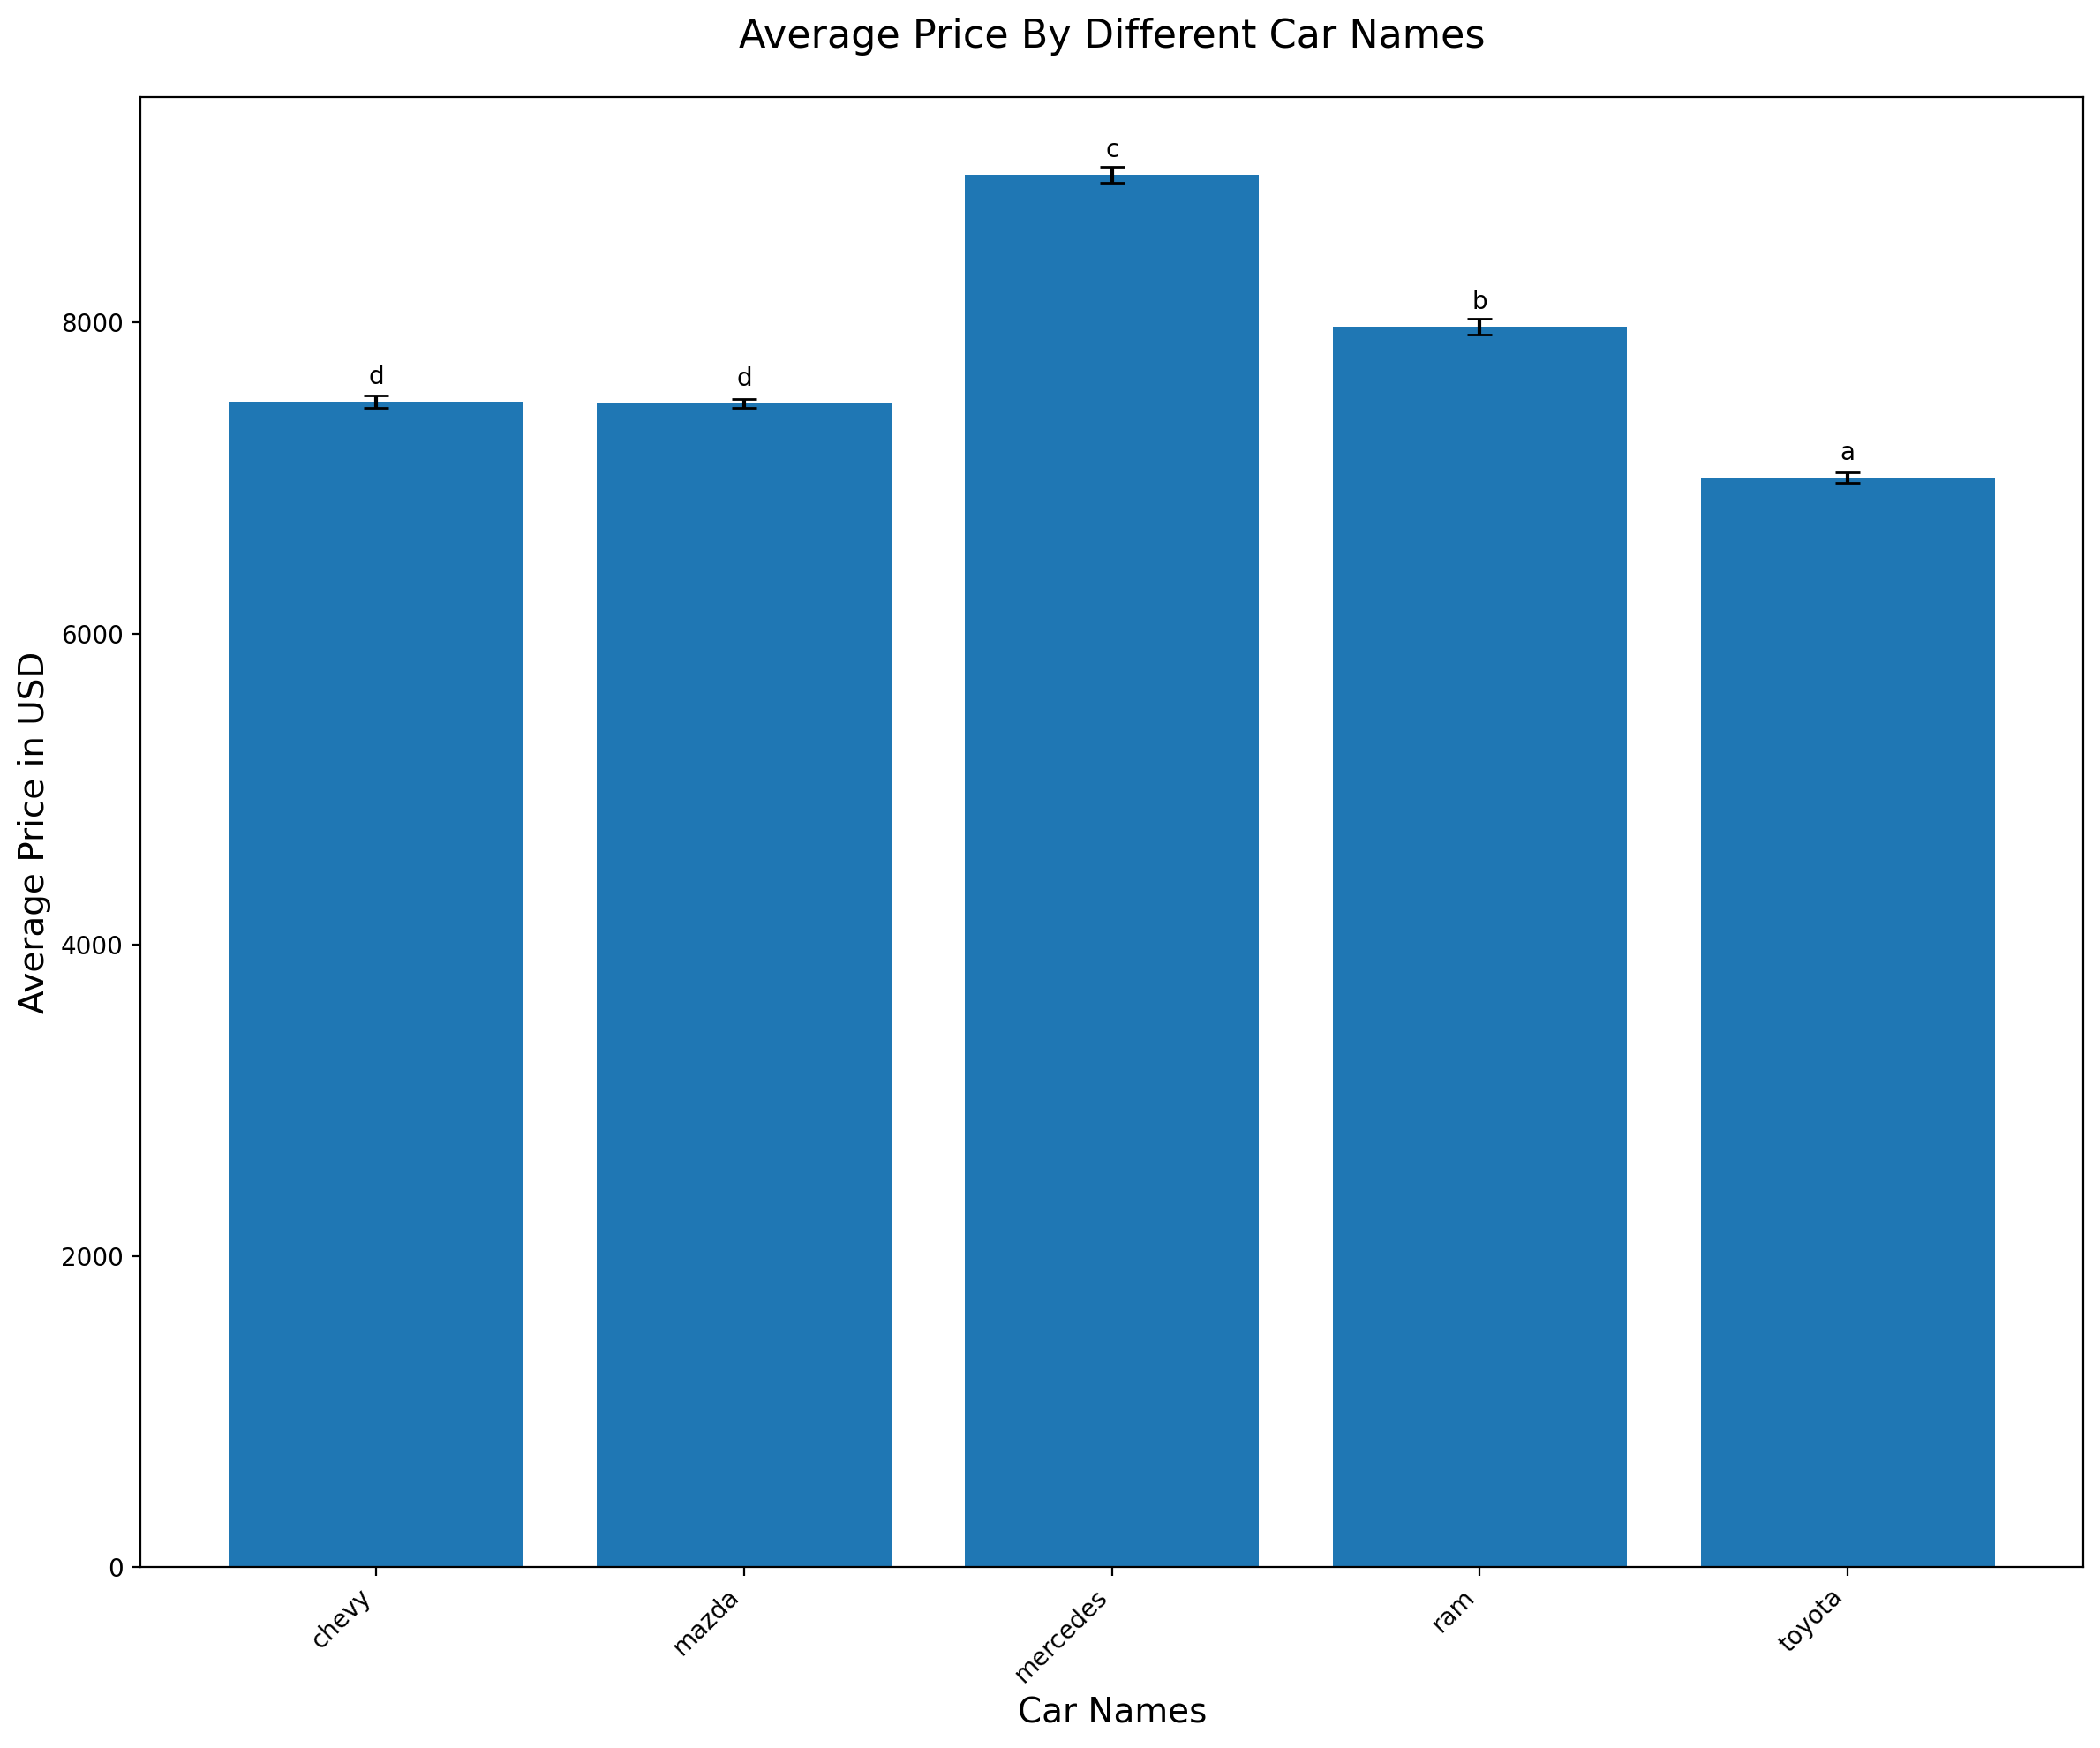

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10), dpi=200)
error = np.full(len(df_plot_car), df_plot_car['sem'])
custom_letters = group_labels

# Create the bar plot
bars = plt.bar(df_plot_car['car_name'], df_plot_car['mean'], yerr=error, capsize=5)

# Add annotations above bars
for bar, car_name in zip(bars, df_plot_car['car_name']):
    height = bar.get_height()
    plt.annotate(
        custom_letters[car_name],
        xy=(bar.get_x() + bar.get_width() / 2, height + 0.8),
        xytext=(0, 5),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom'
    )

# Set x-ticks with rotation
plt.xticks(
    ticks=range(len(df_plot_car['car_name'])),
    labels=df_plot_car['car_name'],
    rotation=45,
    ha='right'
)

# Add labels and title with larger font sizes and spacing
plt.xlabel('Car Names', fontsize=14)
plt.ylabel('Average Price in USD', fontsize=14)
plt.title('Average Price By Different Car Names', fontsize=16, pad=20)  # Increased title font size and added padding

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
